In [133]:
import cv2
from forwardD_v1 import wm_au_emb
import numpy as np
from matplotlib import pyplot as plt
from detectD_v1 import *
from recoveryD_v1 import stage_1_recovery
from skimage.metrics import structural_similarity as ssim


In [134]:
image1 = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\\A_Data\\Data8Images\\airplane.png")
w_image1 = wm_au_emb(image1,(13,17,19))
print("PSNR1",cv2.PSNR(image1,w_image1))

PSNR1 46.35611807545847


In [135]:
print("PSNR1",cv2.PSNR(image1,w_image1))

PSNR1 46.35611807545847


In [136]:
N = 512
t_all_image = np.random.randint(
    low=0, 
    high=256,
    size=(N, N, 3),
    dtype=np.uint8
)

In [137]:
tamper_image = w_image1.copy()
tamper_image[156-81:156+81,156-81:156+81,:]= t_all_image[156-81:156+81,156-81:156+81,:]
lv1_matrix = level_one_detection(tamper_image)
lv2_matrix = lv1_matrix.copy()
lv3_matrix = lv1_matrix.copy()
for channel in range(3):
    lv2_matrix[:,:,channel] = level_two_detection(lv1_matrix[:,:,channel])
    lv3_matrix[:,:,channel] = level_three_detection(lv2_matrix[:,:,channel])

In [138]:
r1_image,lv4_BGR= stage_1_recovery(t_img=tamper_image,key=(13,17,19))


In [139]:

print(cv2.PSNR(r1_image,w_image1))


36.25207063448623


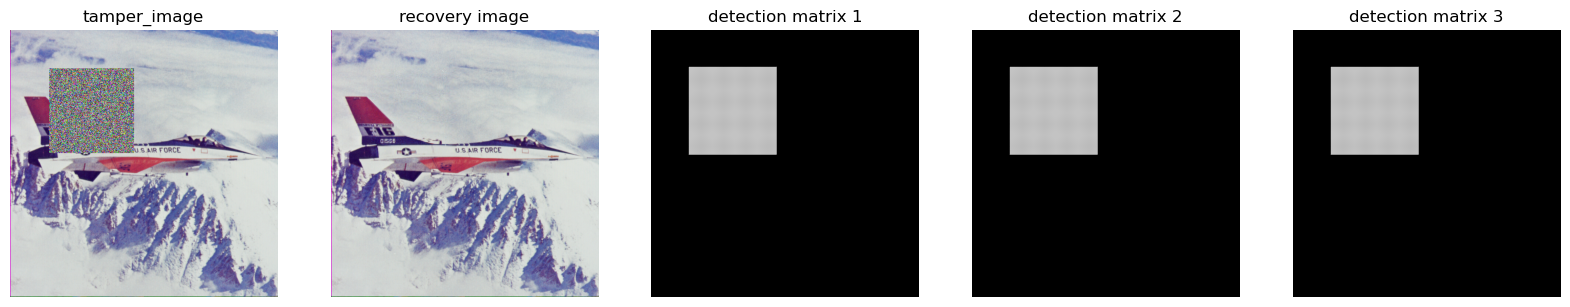

In [140]:
fig, axes = plt.subplots(1, 5,figsize = (20,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()
axes[4].set_axis_off()

axes[0].set_title(f'tamper_image')
axes[1].set_title(f'recovery image')
axes[2].set_title(f'detection matrix 1')
axes[3].set_title(f'detection matrix 2')
axes[4].set_title(f'detection matrix 3')

axes[0].imshow(cv2.cvtColor(tamper_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(cv2.cvtColor(r1_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(1-lv4_BGR[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(1-lv4_BGR[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[4].imshow(1-lv4_BGR[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

In [141]:
mask1 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not lv4_BGR[int(i/1),int(j/1),0]:
            mask1[i,j] = 255
mask2 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not lv4_BGR[int(i/1),int(j/1),1]:
            mask2[i,j] = 255
mask3 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not lv4_BGR[int(i/1),int(j/1),2]:
            mask3[i,j] = 255

In [142]:
dst = tamper_image.copy()
dst[:,:,0] = cv2.inpaint(r1_image[:,:,0],mask1,0,cv2.INPAINT_TELEA)
dst[:,:,1] = cv2.inpaint(r1_image[:,:,1],mask2,0,cv2.INPAINT_TELEA)
dst[:,:,2] = cv2.inpaint(r1_image[:,:,2],mask3,0,cv2.INPAINT_TELEA)
print(cv2.PSNR(dst,w_image1))

40.24651463807848


In [143]:
ssim(cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY),cv2.cvtColor(w_image1,cv2.COLOR_BGR2GRAY))

0.9907565500491982

37.18808880263845,36.616751036153495,43.029856683846575,41.048504092388626,38.385184698582734,38.57216210375967,37.748617398683436,37.64337983283317

0.9840823269904138,0.9872590818911392,0.9918939984212711,0.9876193972129975,0.9845525881452781,0.9887615914037045,0.9814886984166682,0.9900269565103634

sailboat,house,splash,tiffany,peppers,lena,baboon,airplane

In [144]:
np.mean([37.18808880263845,36.616751036153495,43.029856683846575,41.048504092388626,38.385184698582734,38.57216210375967,37.748617398683436,37.64337983283317])

38.779068081110765

In [145]:
np.mean([0.9840823269904138,0.9872590818911392,0.9918939984212711,0.9876193972129975,0.9845525881452781,0.9887615914037045,0.9814886984166682,0.9900269565103634])

0.9869605798739794